# Homework 2

For this homework we have used cloud technologies (Google Colab) in order to have enough memory to handle the dataset and to store the csv files without saving them on our personal computers

In [2]:
from google.colab import drive, files
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, jarque_bera, mannwhitneyu, spearmanr
import seaborn as sns

## Load dataset

In [3]:
drive.mount('/content/drive') # To execute only the first time

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/ADM-HW2/data/steam_reviews.csv'
df = pd.read_csv(path)

print("Upload was successful")

Upload was successful


## [RQ 1] 
### Exploratory Data Aanalysis

#### Dataset dimension

In [5]:
print("The dataset has %d rows and %d columns" % (df.shape[0], df.shape[1]))

The dataset has 21747371 rows and 23 columns


#### Let's have a look at the first 5 and the last 5 rows of the dataset

#### First 5

In [6]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


#### Last 5

In [7]:
df.tail()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,0.000000,0,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,0.000000,0,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,0.474138,0,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,0,0.386022,11,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09
21747370,21747375,546560,Half-Life: Alyx,65644930,schinese,WMR加载中闪退，无法进入游戏\nWMR Flashback in Load，cant pl...,1584986505,1592060800,True,0,0,0.416107,5,True,False,False,76561198116747069,253,7,1062.0,0.0,8.0,1.602858e+09


The first step is to look at the head and tail of the data. Proceed by viewing only the first 5 observations and the last 5.

#### Dataset structure

##### The analysis continues with some observations on the structure of the data-set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

In the dataset there are 23 variables, columns, and about 21 million observations, rows.
There are several types of variables divided into:
- 11 int64: integer type variables;
- 5 float64: double precision float type variables;
- 4 bool: True or False stored as a byte type variables;
- 3 object: string type variable

In [9]:
df.isnull().sum()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

Null values are present only in variables that were not taken into consideration during the analysis so they generate no issues.


#### Percentage of positive review

##### The focus of the analysis then shifted to the type of reviews, was then calculated the percentage of games reviews positive on the total reviews.

In [10]:
df2 = df[df["recommended"]== True]
# perc = round(float(len(df2)/len(df)*100), 2)
print("The percentage of positive reviwes is: %.2f" % (len(df2) / len(df) * 100))
# print (str(perc) + "%")

The percentage of positive reviwes is: 87.47


#### Box-plot

##### With the box plot, a graphical analysis of the differences between the distribution of votes related to reviews considered positive and the distribution of votes related to reviews considered negative is carried out

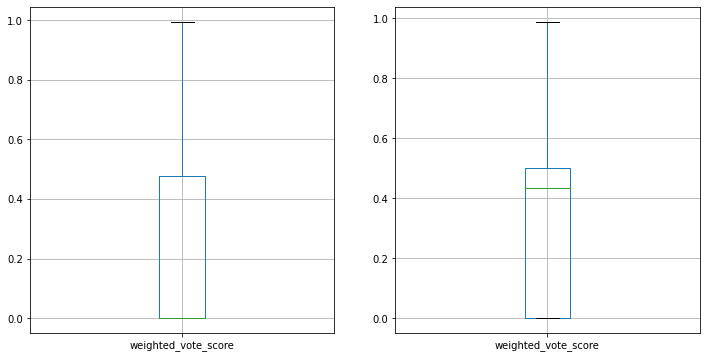

In [11]:
## Good review
df1 = pd.DataFrame(df["weighted_vote_score"][df["recommended"]== True])
df2 = pd.DataFrame(df["weighted_vote_score"][df["recommended"]== False])

fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df1.boxplot()
plt.subplot(1,2,2)
df2.boxplot()

Thanks to this type of chart you are able to make some considerations on how the ratings given to negative reviews and those given to positive reviews are distributed. Both distributions have a heavy right while the median values differ since that of the votes related to positive reviews is almost equal to 0 while the median of the distribution of votes related to negative reviews is about 4. The amplitude of the Similar box indicates a similar variability of the data of the two distributions. Both distributions are asymmetric, which is obvious because the median values are not in the center of the respective boxes. In neither of the two distributions are there any suspicious outliers. 

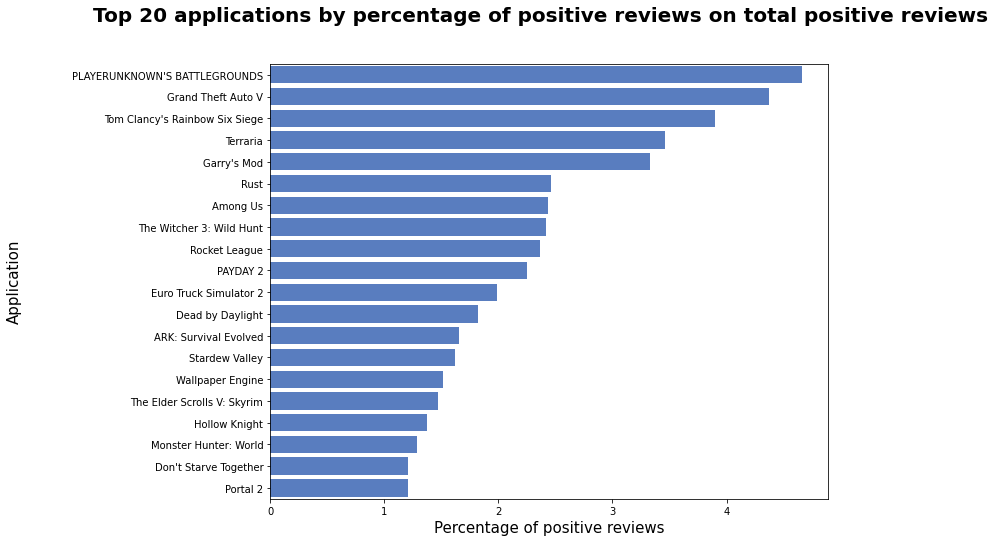

In [12]:
## Giochi con la maggior percentuale di recensioni positive

df2=df[df['recommended']==True]

perc= (df2.app_name.value_counts() * 100) /len(df2)

perc = (perc).sort_values(ascending = False)[:20].reset_index()
fig = plt.figure(figsize=(10,8))
fig.suptitle('Top 20 applications by percentage of positive reviews on total positive reviews',fontsize=20, weight = 'bold', ha='center')
sns.set_color_codes("muted")
plot = sns.barplot(x='app_name',y = 'index', data = perc, color = 'b')
plot.yaxis.labelpad=50
plot.set_ylabel('Application',fontsize=15)
_ = plot.set_xlabel('Percentage of positive reviews',fontsize=15)

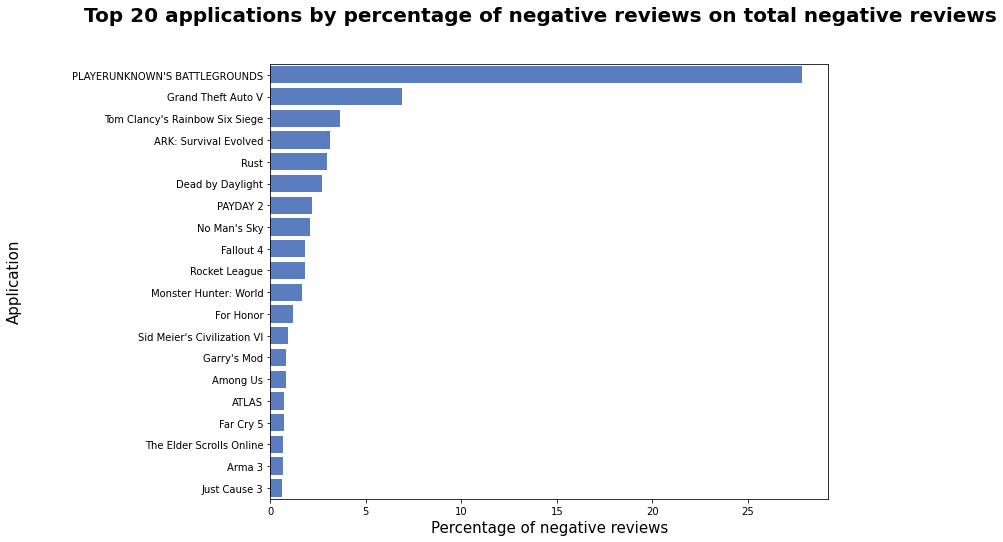

In [13]:
## Giochi con la maggior percentuale di recensioni negative

df2=df[df['recommended']==False]
perc=df2.app_name.value_counts()/len(df2)
perc = (perc*100).sort_values(ascending = False)[:20].reset_index()
fig = plt.figure(figsize=(10,8))
fig.suptitle('Top 20 applications by percentage of negative reviews on total negative reviews',fontsize=20, weight = 'bold', ha='center')
sns.set_color_codes("muted")
plot = sns.barplot(x='app_name',y = 'index', data = perc, color = 'b')
plot.yaxis.labelpad=50
plot.set_ylabel('Application',fontsize=15)
_ = plot.set_xlabel('Percentage of negative reviews',fontsize=15)

From these two charts it emerges that the charts with high percentages of positive reviews occupy high places also in the ranking based on the percentage of negative reviews. You might think that the high number of positive reviews is due only to a high number of absolute reviews obtained from that particular video game that is not the one really appreciated by players.

The following chart shows us the games that have the best percentage of positive reviews calculated on the total of reviews made on that game.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0, flags=flags)


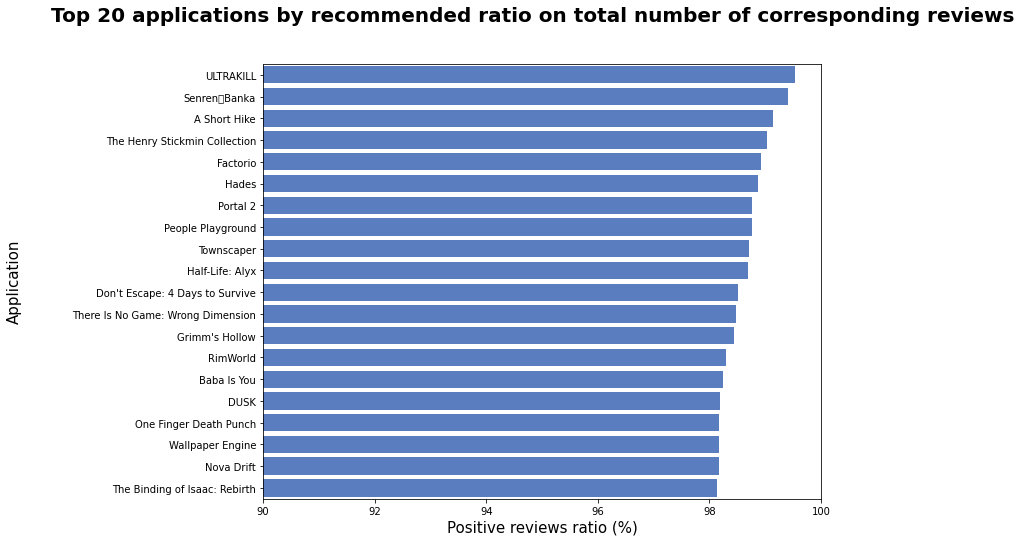

In [14]:
# Giochi con il miglior rapporto positive/totale

df2=df[df['recommended']==True]
a = df2.groupby("app_name").count()["recommended"]
b = df.groupby("app_name").count()["recommended"]

ratio=(((a/b)*100).sort_values(ascending=False)[:20].reset_index())

fig = plt.figure(figsize=(10,8))
fig.suptitle('Top 20 applications by recommended ratio on total number of corresponding reviews',fontsize=20, weight = 'bold', ha='center')
sns.set_color_codes("muted")
plot = sns.barplot(x='recommended',y = 'app_name', data = ratio, color = 'b')
plot.yaxis.labelpad=50
plot.set(xlim=(90, 100))
plot.set_ylabel('Application',fontsize=15)
_ = plot.set_xlabel('Positive reviews ratio (%)',fontsize=15)


As we have previously guessed the game that had the highest percentage of positive reviews is not present in this rankings since it also received a high number of criticism failing to satisfy all users who have played there.

## [RQ2]

#### Plot the number of reviews for each application in descending order

In [15]:
df1 = df['app_name'].reset_index()

Since the total number of reviewed applications is large and the resulting plot would be unreadable, we have decided to plot only the first 10 most reviewed apps.

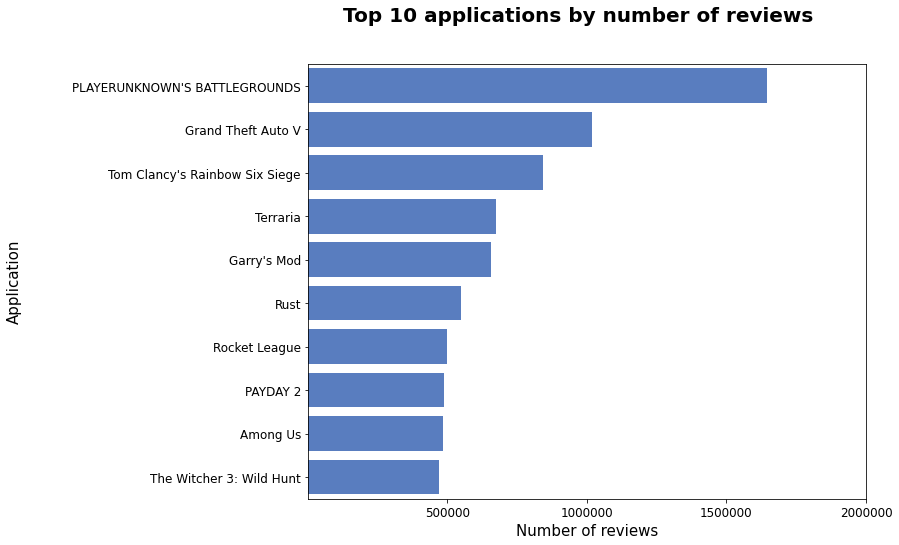

In [16]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Top 10 applications by number of reviews',fontsize=20, weight = 'bold', ha='center')
ordered_df = df1.groupby('app_name').size().reset_index().sort_values(0, ascending = False, ignore_index = True)[:10]
sns.set_color_codes("muted")
plot = sns.barplot(x=0,y = 'app_name', data = ordered_df, color = 'b')
ticks = [500000, 1000000, 1500000, 2000000]
plot.yaxis.labelpad=50
plot.set_xticks(ticks)
plot.set_yticklabels(plot.get_yticklabels(),ha = 'right', fontsize=12)
plot.set_xticklabels(ticks, fontsize=12)
plot.set_ylabel('Application',fontsize=15)
_ = plot.set_xlabel('Number of reviews',fontsize=15)

We see that only the first two most reviewed apps reach a million reviews, while the number of reviews of the remaining ones decreases rapidly under 500000.

#### What applications have the best Weighted Vote Score?

In [17]:
df1 = df[['app_name', 'weighted_vote_score']].reset_index()

To answer this question we are going to compute the average Weighted Vote Score for each application and then show the 10 applications with the highest values.

In [18]:
app = df1.groupby('app_name').mean().reset_index().sort_values('weighted_vote_score', ascending = False, ignore_index = True)
print('The best 10 applications in terms of Weighted Vote Score are:')
for i in range(10):
    print(f"{i+1}. {app['app_name'][i]}")   

The best 10 applications in terms of Weighted Vote Score are:
1. Hunt Down The Freeman
2. Urban Empire
3. METAL GEAR SURVIVE
4. Identity
5. Umbrella Corps
6. Torment: Tides of Numenera
7. BERSERK and the Band of the Hawk
8. DRAGON QUEST HEROES™ II
9. X Rebirth
10. Toukiden 2


#### Which applications have the most and the least recommendations?

In [19]:
df1 = df[['app_name', 'recommended']].reset_index()

In order to have a larger view on our data, we will have a look both at the 5 applications with most recommendations and the 5 least recommended ones.

In [20]:
best = df1.groupby('app_name').sum().reset_index().sort_values('recommended', ascending = False, ignore_index = True)[:5]
print('The top 5 recommended applications are:')
for i in range(5):
    print(f"{i+1}. {best['app_name'][i]}")

The top 5 recommended applications are:
1. PLAYERUNKNOWN'S BATTLEGROUNDS
2. Grand Theft Auto V
3. Tom Clancy's Rainbow Six Siege
4. Terraria
5. Garry's Mod


In [21]:
worst = df1.groupby('app_name').sum().reset_index().sort_values('recommended', ascending = True, ignore_index = True)[:5]
print('The worst 5 recommended applications are:')
for i in range(5):
    print(f"{i+1}. {worst['app_name'][i]}")  

The worst 5 recommended applications are:
1. Neon Hardcorps
2. DRAGON QUEST HEROES™ II
3. Identity
4. Shadow Complex Remastered
5. Out of the Park Baseball 19


#### How many of these applications were purchased, and how many were given for free?

In [22]:
df1 = df['received_for_free'].reset_index()

We are going to give the count of free versus purchased applications over the total number of reviews. This means we are looking at the purchases of the single users that have reviewed an application.

In [23]:
free = df1.sum().reset_index()[0][1]
tot = df1.shape[0]
purchased = tot - free
print(f"{round((purchased/tot*100),2)}% ({purchased}) of applications were purchased, while {round((free/tot*100),2)}% ({free}) were given for free.")

96.84% (21059310) of applications were purchased, while 3.16% (688061) were given for free.


## [RQ3]

#### What is the most common time that authors review an application?

In [24]:
timestamps = pd.to_datetime(df['timestamp_created'], unit='s').dt.strftime('%H:%M:%S')
print('The reviews are written, on average, at {}.'.format(timestamps.value_counts().index[0]))

The reviews are written, on average, at 15:54:53.


#### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

In [25]:
def count_reviews(review_timestamps, time_intervals):
    review_intervals = []
    for interval in time_intervals:
        initial_time, final_time = interval
        count = len(df[timestamps.apply(lambda x : x > initial_time and x < final_time)])
        review_intervals.append(count)

    labels = [(lambda x: str(x))(x) for x in time_intervals]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle('Number of reviews for given time intervals',fontsize=20, weight = 'bold', ha='center')
    sns.set_color_codes("muted")
    plot = sns.barplot(x=review_intervals,y = labels, color = 'b')
    plot.yaxis.labelpad=50
    plot.set_yticklabels(plot.get_yticklabels(),ha = 'right', fontsize=12)
    plot.set_ylabel('Time intervals',fontsize=15)
    _ = plot.set_xlabel('Number of reviews',fontsize=15)

    return

#### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

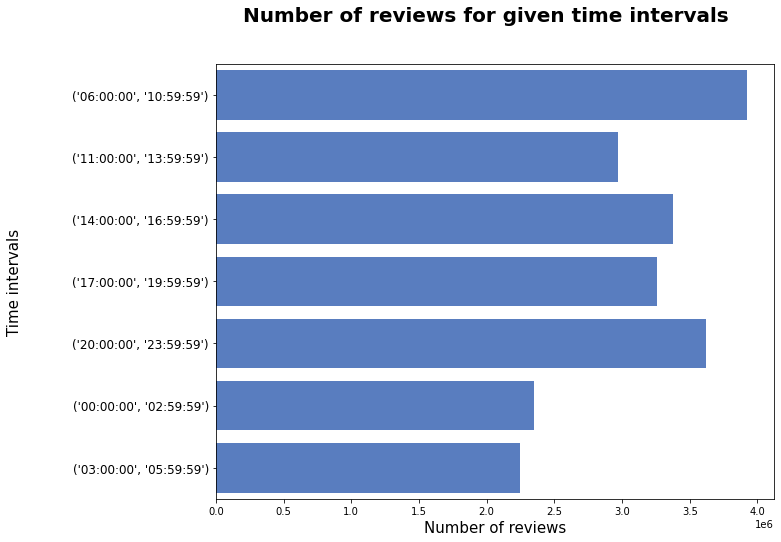

In [26]:
time_intervals = [('06:00:00','10:59:59'), ('11:00:00','13:59:59'), ('14:00:00','16:59:59'), ('17:00:00','19:59:59'),('20:00:00','23:59:59'), ('00:00:00','02:59:59'), ('03:00:00','05:59:59')]

count_reviews(df, time_intervals)

## [RQ4]

#### What are the top 3 languages used to review applications?

In [27]:
df1 = pd.DataFrame(df['language'])
ctot = df1.shape[0]
countdf = df1.groupby('language').size()
tot = countdf.sort_values(ascending=False)[:3]
print(tot)

language
english     9635437
schinese    3764967
russian     2348900
dtype: int64


#### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

We don't load the entire dataset but only the columns that we need in order to save memory and computational time

In [28]:
def language_filter(dataset = "/content/drive/MyDrive/ADM-HW2/data/steam_reviews.csv", languages = ['english']):
    cols = ['language', 'votes_helpful', 'votes_funny']
    new = pd.DataFrame(columns=cols)
    df1 = pd.read_csv(dataset, usecols=cols)
    df2 = df1[df1['language'].isin(languages)]

    return df2

#### Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?


Filter dataset with funny column

In [29]:
df1 = language_filter(languages=tot.index)

Funny percentage

In order to have a clearer view we are going to give the separate percentages

In [32]:
rete = pd.DataFrame(df1[(df1['language']==tot.index[0]) & (df1['votes_funny'] > 0)]).count()[0]

rets = pd.DataFrame(df1[(df1['language']==tot.index[1]) & (df1['votes_funny'] > 0)]).count()[0]

retr = pd.DataFrame(df1[(df1['language']==tot.index[2]) & (df1['votes_funny'] > 0)]).count()[0]

print("Percentage of %s reviews voted as 'funny': %.2f" % (tot.index[0], (rete * 100) / df1.shape[0]))
print("Percentage of %s reviews voted as 'funny': %.2f" % (tot.index[1], (rets * 100) / df1.shape[0]))
print("Percentage of %s reviews voted as 'funny': %.2f" % (tot.index[2], (retr * 100) / df1.shape[0]))

Percentage of english reviews voted as 'funny': 6.90
Percentage of schinese reviews voted as 'funny': 2.83
Percentage of russian reviews voted as 'funny': 2.49


#### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

Filter dataset with helpful column

In [33]:
rethe = pd.DataFrame(df1[(df1['language']==tot.index[0]) & (df1['votes_helpful'] > 0)]).count()[0]

reths = pd.DataFrame(df1[(df1['language']==tot.index[1]) & (df1['votes_helpful'] > 0)]).count()[0]

rethr = pd.DataFrame(df1[(df1['language']==tot.index[2]) & (df1['votes_helpful'] > 0)]).count()[0]

print("Percentage of %s reviews voted as 'helpful': %.2f" % (tot.index[0], (rethe * 100) / df1.shape[0]))
print("Percentage of %s reviews voted as 'helpful': %.2f" % (tot.index[1], (reths * 100) / df1.shape[0]))
print("Percentage of %s reviews voted as 'helpful': %.2f" % (tot.index[2], (rethr * 100) / df1.shape[0]))

Percentage of english reviews voted as 'helpful': 17.87
Percentage of schinese reviews voted as 'helpful': 6.00
Percentage of russian reviews voted as 'helpful': 5.29


## [RQ5]

#### Plot the top 10 most popular reviewers and the number of reviews.

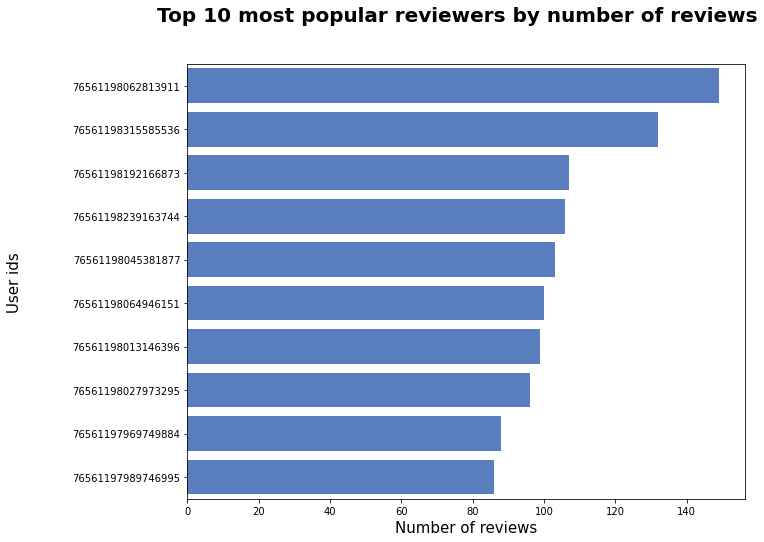

In [34]:
del df1
df1 = pd.DataFrame(df[['app_name', 'recommended', 'author.steamid', 'author.num_reviews', 'steam_purchase', 'received_for_free']])
countdf = df1.groupby('author.steamid').size()
tot = countdf.sort_values(ascending=False)[:10]

ord = tot.index.values
fig = plt.figure(figsize=(10,8))
fig.suptitle('Top 10 most popular reviewers by number of reviews',fontsize=20, weight = 'bold', ha='center')
sns.set_color_codes("muted")
plot = sns.barplot(x=0,y = 'author.steamid', data = tot.reset_index(), color = 'b', orient='h', order=ord)
plot.yaxis.labelpad=50
plot.set_ylabel('User ids',fontsize=15)
_ = plot.set_xlabel('Number of reviews',fontsize=15)

#### What applications did the most popular author review?

In [35]:
id_mpa = tot[tot == tot.iloc[0]].index[0]
df2 = pd.DataFrame(df[(df['author.steamid']==id_mpa)])[['app_name', 'recommended', 'steam_purchase', 'received_for_free']]
totrev = df2.count()[0] # 149
print(list(df2['app_name']))

['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two', 'Portal 2', "Garry's Mod", "Sid Meier's Civilization V", 'Dead by Daylight', "Sid Meier's Civilization VI", 'Subnautica', 'Human: Fall Flat', 'Banished', 'Celeste', 'Getting Over It with Bennett Foddy', 'A Hat in Time', 'The Forest', 'Axiom Verge', 'The Binding of Isaac: Rebirth', 'To the Moon', 'Cave Story+', 'Titan Souls', 'Super Meat Boy', "Don't Escape: 4 Days to Survive", 'Volgarr the Viking', 'Enter the Gungeon', 'Salt and Sanctuary', 'Hollow Knight', 'The End Is Nigh', 'Factorio', 'RimWorld', 'Insurgency: Sandstorm', 'Euro Truck Simulator 2', 'Foundation', 'Kenshi', 'Into the Breach', 'Warhammer: Vermintide 2', 'DOOM Eternal', 'Age of Empires: Definitive Edition', 'Void Bastards', 'Stardew Valley', 'Among Us', 'Blackwake', 'Little Nightmares', 'Bomber Crew', 'Rust', 'HITMAN™ 2', 'Phasmophobia', 'Mount & Blade: Warband', 'Resident Evil 2', 'Slime Rancher', 'Hotline Miami', 'Tomb Raider', 'BattleBlock Theater', 'D

#### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [36]:
revp = df2[df2['received_for_free'] == False]
print("He purchase %d applications that is %.2f of the total he reviews" % (revp.count()[0], ((revp.count()[0] * 100) / totrev)))

revp = df2[df2['received_for_free'] == True]
print("He get as free %d applications that is %.2f of the total he reviews" % (revp.count()[0], ((revp.count()[0] * 100) / totrev)))

He purchase 145 applications that is 97.32 of the total he reviews
He get as free 4 applications that is 2.68 of the total he reviews


#### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [37]:
revpp = df2[(df2['received_for_free'] == False) & (df2['recommended'] == True)]
revpn = df2[(df2['received_for_free'] == False) & (df2['recommended'] == False)]
print("He reviewed positively %d purchased applications" % (revpp.count()[0]))
print("He reviewed negatively %d purchased applications" % (revpn.count()[0]))

revfp = df2[(df2['received_for_free'] == True) & (df2['recommended'] == True)]
revfn = df2[(df2['received_for_free'] == True) & (df2['recommended'] == False)]
print("He reviewed positively %d gratis applications" % (revfp.count()[0]))
print("He reviewed negatively %d gratis applications" % (revfn.count()[0]))

He reviewed positively 142 purchased applications
He reviewed negatively 3 purchased applications
He reviewed positively 4 gratis applications
He reviewed negatively 0 gratis applications


## [RQ6]

#### What is the average time (days and minutes) a user lets pass before he updates a review?

In [38]:
df1 = pd.DataFrame(df[['timestamp_created', 'timestamp_updated', 'author.steamid']])
df1['timestamp_created'] = pd.to_datetime(df1['timestamp_created'], unit='s')
df1['timestamp_updated'] = pd.to_datetime(df1['timestamp_updated'], unit='s')

Let's add a column containing the time difference between the time the review was updated and the time it was originally created.

It makes sense not to consider those reviews that have never been updated, because in that case the time difference would be equal to zero and affect the computation of the average time for those reviews that have in fact been updated. For completeness, we are also going to compute how many reviews have never been updated and will therefore not be considered.

In [39]:
df1['diff'] = df1['timestamp_updated'] - df1['timestamp_created']
cond_updated = df1['diff'] != pd.to_timedelta('0')
updated = df1[cond_updated]
nu_ratio = (updated.shape[0] * 100) / df1.shape[0]
print(f'{round((100-nu_ratio),2)}% of the reviews have never been updated.')

88.74% of the reviews have never been updated.


Let's now compute the average time based on the rest of the reviews.

In [41]:
avg = updated['diff'].mean()
print(f'The average time a user lets pass before he updates a review is {avg.days} days and {avg.seconds // 60} minutes.')

The average time a user lets pass before he updates a review is 321 days and 46 minutes.


#### Plot the top 3 authors that usually update their reviews.

The top 3 authors that usually update their reviews are:
1. 76561198192166873
2. 76561198206999976
3. 76561198072450805


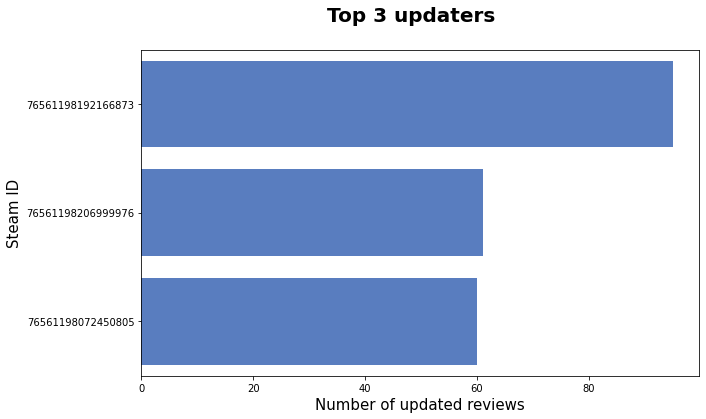

In [42]:
top = updated.groupby('author.steamid').count().reset_index().sort_values('timestamp_updated', ascending = False, ignore_index = True)[:3]
print('The top 3 authors that usually update their reviews are:')
for i in range(3):
    print(f"{i+1}. {top['author.steamid'][i]}")
fig = plt.figure(figsize=(10,6))
fig.suptitle('Top 3 updaters',fontsize=20, weight = 'bold', ha='center')
sns.set_color_codes("muted")
plot = sns.barplot(x='timestamp_updated',y = 'author.steamid', data = top, color = 'b', orient='h', order = top['author.steamid'])
plot.set_ylabel('Steam ID',fontsize=15)
_ = plot.set_xlabel('Number of updated reviews',fontsize=15)

## [RQ7]

#### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

To compute this probability, let's find the number of reviews that satisfy the condition "Weighted Vote Score >= 0.5" and consider the ratio over the total number of reviews.

In [43]:
df1 = pd.DataFrame(df['weighted_vote_score'])
condition_v = df1['weighted_vote_score'] >= 0.5
at_least_05 = df1[condition_v]
prob_v = at_least_05.shape[0] / df1.shape[0]
print(f'The probability that a review has a Weighted Vote Score equal or bigger than 0.5 is {round(prob_v*100, 2)}%.')

The probability that a review has a Weighted Vote Score equal or bigger than 0.5 is 22.0%.


#### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [44]:
df1 = pd.DataFrame(df[['weighted_vote_score', 'votes_funny']])

For clarity's sake, let's qualify the events:
- W: the Weighted Vote Score being bigger than 0.5;
- F: the review has at least one vote as funny.\
\
The probability we are interested in is:
<div align='center'>$ P(F|W) = \frac{P(F \cap W)}{P(W)}  $</div>

\
Therefore, we need to compute the probability of event W and the probability of the intersection of the two events (aka the probability that they are simultaneously true).

In [45]:
condition_w = df1['weighted_vote_score'] > 0.5
bigger_05 = df1[condition_w]
prob_w = bigger_05.shape[0] / df1.shape[0]
condition_f = df1['votes_funny'] >= 1
at_least_1f = df1[condition_f]
prob_f = at_least_1f.shape[0] / df1.shape[0]
condition_intersect = condition_w & condition_f
intersection = df1[condition_intersect]
prob_intersect = intersection.shape[0] / df1.shape[0]
prob_fw = prob_intersect / prob_w
print(f'The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is {round(prob_fw*100,2)}%.')

The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is 24.98%.


#### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

We can define independence between two generic events A and B as follows:
<div align='center'>$P(A|B) = P(A)$</div>
Or, alternatively:
<div align='center'> $ P(B|A) = P(B) $ </div>

It's sufficient to verify either one of the two conditions mentioned above to prove that the events are in fact independent.

As before, first of all let's qualify the events:
- V: the review has a Weighted Vote Score equal or bigger than 0.5;
- F: the review has at least on vote as funny.

Let's compute the probability of the event $P(V|F)$ and compare it to $P(V)$, which we have already computed. As before, to do so we first need to compute the probability of the intersection of the two events, $P(V \cap F)$.

In [46]:
condition_intersection = condition_v & condition_f
intersect = df1[condition_intersection]
prob_int = intersect.shape[0] / df1.shape[0]
prob_vf = prob_int / prob_f
if prob_vf == prob_f:
    print('The two events are independent.')
else:
    print('The two events are not independent.')

The two events are not independent.


## [RQ8]

#### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

The first step to check if the difference between the Weight Vote Score written in Chinese and those written in Russian can be considered significant, is to go and select all the observations related to the reference languages. As for Chinese will be considered both reviews written in traditional Chinese and simplified Chinese.
The second step will then be to perform a statistical test on the average of the two populations. In order to understand which type of test to carry out, two studies are first performed: one on the variance and one on the normality of the two populations taken in analysis.

In [47]:
## Extract columns

df2 = df.filter(['language', 'weighted_vote_score'])

x1 = df2[(df2['language'] == 'schinese') | (df2['language'] == 'tchinese')]
x2 = df2[df2['language'] == 'russian']

In [48]:
## Variance
var_x1 = x1.weighted_vote_score.var()
var_x2 = x2.weighted_vote_score.var()
print("Variance of Chinese group: \n", round(var_x1, 3))
print("Variance of Russian group: \n", round(var_x2, 3))

Variance of Chinese group: 
 0.057
Variance of Russian group: 
 0.066


The variances do not seem to present a particularly high difference therefore the true answer on which type of test to use will be given to us from the verification of the normality of the distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


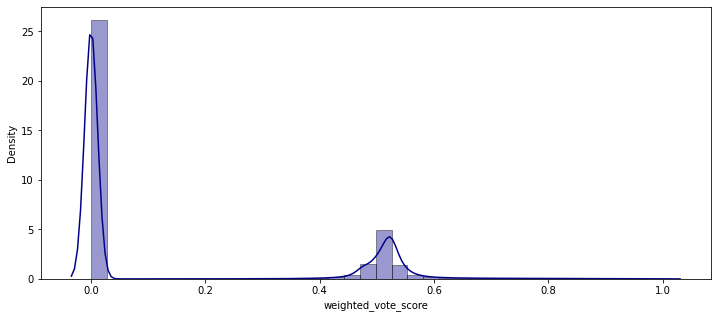

In [49]:
## Check Normalility - Histogram Plot
plt.rcParams['figure.figsize'] = (12, 5)
sns.distplot(x1.weighted_vote_score, hist = True, kde = True, 
             bins = int(180/5), color = 'darkblue', 
             hist_kws = {'edgecolor':'black'},)

In [50]:
## Shapiro-Wilk
stat, p = shapiro(x1.weighted_vote_score)
print('Statistics = %.3f, p-value = %.3f' % (stat, p))
## Intepret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 0.602, p-value = 0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
## Jarque-Bera
jb = jarque_bera(x1.weighted_vote_score)
stat, p = round(jb[0]), jb[1]
print('Statistics = %.3f, p-value = %.3f' % (stat, p))
## Intepret
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 869595.000, p-value = 0.000
Sample does not look Gaussian (reject H0)


As shown by the graphs and the tests carried out, the two populations have non-gaussian distributions. The **Mann-Whitney** test was chosen as a test to verify if the difference between these populations is significant, and was designed to be used in non-normal situations where it is not possible to apply the classic t-test.

In [52]:
## Test Mann-Whitney
res = mannwhitneyu(x1.weighted_vote_score, x2.weighted_vote_score)
print('Statistics = %.3f, p-value = %.3f' % (round(res[0],3), res[1]))
## Intepret
alpha = 0.05
if p > alpha:
  print('The difference is not due to random sampling (fail to reject H0)')
else:
	print('The difference is due to random sampling (reject H0)')

Statistics = 4084405689413.500, p-value = 0.000
The difference is due to random sampling (reject H0)


#### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

In [53]:
## Extract columns
df1 = df.filter(['timestamp_created', 'timestamp_updated', 'weighted_vote_score'])

## New Columns
df1["DiffTime"] = df1.timestamp_updated - df1.timestamp_created

df1 = df1.drop(['timestamp_created'], axis = 1)
df1 = df1.drop(['timestamp_updated'], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


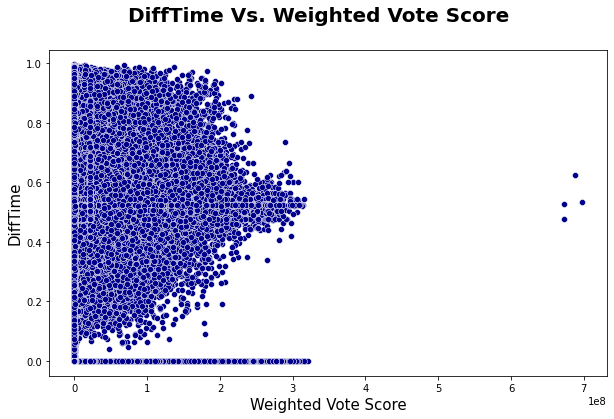

In [54]:
## Scatterplot
fig = plt.figure(figsize=(10,6))
fig.suptitle('DiffTime Vs. Weighted Vote Score',fontsize=20, weight = 'bold', ha='center')
plot = sns.scatterplot(df1.DiffTime, df1.weighted_vote_score, color = 'darkblue')
plot.set_ylabel('DiffTime',fontsize=15)
_ = plot.set_xlabel('Weighted Vote Score',fontsize=15)

From the scatterplot does not seem to emerge the presence of any kind of link between the two variables.

#### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


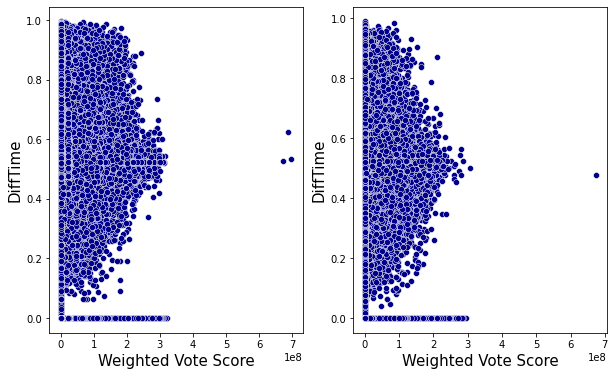

In [55]:
## INSERIRE TITOLI GRAFICI

df1 = df.filter(['timestamp_created', 'timestamp_updated', 'weighted_vote_score', 'recommended'])
df1["DiffTime"] = df1.timestamp_updated - df1.timestamp_created

df_T = df1[df.recommended == True]
df_F = df1[df.recommended == False]

fig = plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plot = sns.scatterplot(df_T.DiffTime, df_T.weighted_vote_score, color = 'darkblue')#, order = top['author.steamid'])
plot.set_ylabel('DiffTime',fontsize=15)
_ = plot.set_xlabel('Weighted Vote Score',fontsize=15)

plt.subplot(1,2,2)
plot = sns.scatterplot(df_F.DiffTime, df_F.weighted_vote_score, color = 'darkblue')#, order = top['author.steamid'])
plot.set_ylabel('DiffTime',fontsize=15)
_ = plot.set_xlabel('Weighted Vote Score',fontsize=15)

Even if we consider separately the distribution of positive reviews and negative reviews, there seems to be a link between the votes and the increase in the time to which they have been updated.

#### What are histograms, bar plots, scatterplots and pie charts used for?

The histogram, the barplot, the scatter charts and the pie chart are exploratory analysis tools used to try to graphically visualize some characteristics present within the data being analyzed.
* **Histogram**: The term "histogram" refers to a Cartesian graph used to describe the distribution in classes of a quantitative variable with many different values. For example, you can use a histogram to illustrate the distribution of age (in completed years), weight (in kg) or heart rate (in mmHg). Histograms are also used in digital photography and photo editing to analyze the brightness of an image. Thanks to it we can observe the distribution peaks, if the distribution is asymmetric or symmetrical and if there are outliers.
* **Barplot**: It shows the relationship between a numerical variable and a categorical one. Each entity of the categorical variable is represented as a bar. The size of the bar represents its numerical value. The main difference with the histogram graph is that a histogram has only one numerical variable as input and shows its distribution.
* **Scatterplot**: Show the relationship between two continuous variables, representing one variable on the x-axis and the other on the y-axis. This type of graph help to show the strength of the linear relationship between two variables, while for regression they often add an estimated line. The data are displayed through a collection of points whose coordinates are from the values of the two variables.
* **Piechart**:  They are circular graphs divided into sections (slices) whose area is proportional to the quantity it represents. This type of graphs are very much used nowadays especially by the mass media even if the experts advise against their use because of the difficulty in comparing the different sections of these graphs, that often do not do justice to the real differences present in the data, both in comparing between praise different pie charts.

#### What insights can you extract from a Box Plot?

The **box-plot** is a visualization used in statistics to represent the distribution of a series of events related to an examined sample.
The diagram represents five summary assessments:
* **x_min**, the minimum value of the distribution.
* **Q1**, first quartile.
* **Med**, second quartile.
* **Q3**, third quartile.
* **x_max**, the maximum value of the distribution.
* **HInf** and **Hsup**, respectively lower and upper extremes, calculated with k = 1,5 or k = 3.


The box represents the quartiles divided into two parts by the median, that allows you to see the position of the distribution. If the median divides the box into equal parts the distribution is symmetrical otherwise it is asymmetrical. Based on the width of the boxes we understand how much data is more or less dispersed. Moustaches represent the difference between the quartiles and the minimum and maximum values, or in any case exceptional, anomalous values, which go beyond the moustaches. The classification of outliers, in particular, is based on the "fences", that is, it is based on the hypothesis that the regular data in the center are approximately symmetrical as in the standard normal case. The length of the mustache shows the normality (short mustache) or exceptionality (long mustache) of the phenomena, and the aberrant values that lie beyond the mustache.
This type of graph is a more synthetic representation than bar and histogram diagrams, and is useful for quickly evaluating macrobehaviors of a sample.


## TQ1

- It computes the k-th element in ascending order present in the set<br>
- $T(n-1) + T(n-2) + T(n-3) + ... + T(1) = (n - 1) * O(n) \implies O(n^2)$ if we don't consider the "loop case" in which, for example, r = 1 and the algorithm takes always the biggest number in A and assigns it to s so the length of L never decreases and therefore we never reach the base case.
- $\Omega(n)$ because to put elements in L and R the algorithm needs to check at least one time all the elements in A even if k is equal to len(L)

## TQ2

- Let's first analyze swapList(): we have a for loop that takes $O(n/2)$ and then all time-constant operations so this function works in $1/2*O(n) = O(n)$. SplitSwap executes the first two operations in constant time, then we have two recursive calls with $T(n) = T(n/2)$ so, in total we have: $T(n) = T(n/2) + T(n/2) + O(n)$.\
Now, we can apply master theorem and write our $T(n) = 2T(n/2) + O(n)$ so $a = b = 2$ and $f(n) = O(n)$.\
We fall in case 2 of MT: 
$T(n) = \Theta(n^{log_b a}) \implies T(n) = \Theta(n^{log_b a}\,log\,n)$\
because $log_2\,2 = 1$\
so our $T(n) = O(n\,log\,n)$
- The algorithm taking the array a, an index l and a length n as input, leaves the first l-1 elements of the array untouched. Then, starting from element with index l, it considers a sub-array of length n. Actually, the algorithm does not create a sub-array but continues to operate on the original array a by using slices delimited by the indexes l and n. We will talk about sub-arrays just so that the explanation can be more clear. The following operations can be described as follows: the algorithm splits the sub-array in half and recursively repeats the operation until its length equals 1. At this point, it starts to come back to the previous calls while performing the subroutine swapList, which reverses the elements of each smaller sub-array, until at the end of the calls the original sub-array of length n appears inverted itself.
The algorithm is not optimal, since it is possible to implement an equivalent version which performs in $O(n)$. This is the code we came up with:
      def splitSwap_opt(a, l, n):
          j = 0
          for i in range(l, int(l+n/2)):
              j += 1
              tmp = a[i]
              a[i] = a[n+l-j]
              a[n+l-j] = tmp


## TQ3

### 1
w = [3, 5, 8, 15]<br>
v = [1, 5, 3, 15]<br>
W = 18<br>
Starting from vtot = 0.<br>
When we add w0 our vtot is 1, adding the second object we sum 5 to tot so we have vtot = 6, then vtot = 9 and then we stop because total weight is 16, if we add the last object we exceed W. But insert first w[3] (starting from 0) object and then w[0] we obtain a vtot of 16 that is greater than 9<br>
### 2
w = [2, 16, 1, 1]<br>
v = [6, 5, 4, 3]<br>
W = 18<br>
Starting from vtot = 0.<br>
We add object 0 and then object one, vtot = 11 and weight is 18 (it correspond to the maximum budget), but if we don't take the first object we can maximize the total value taking the last tree objects and we can obtain total weight of 18 and vtot of 12 (5+4+3) that is greater than 11<br>
### 3
Considering again the first couple of vectors, when we sort them we obtain:<br>
w = [3, 8, 5, 15]<br>
v = [1, 3, 5, 15]<br>
W = 18<br>
Now, we select the first tree objects and then we stop because we cannot select another object without exceeding W=18, so vtot=9 but selecting the last object we can obtain a bigger vtot, so this is also not the optimal solution.